In [23]:
import train_embeddings
import matplotlib.pyplot as plt
import sentence_features
import pickle
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

In [26]:
word2vec_path = "../data/models/word2vec/word2vecGensim.bin"
word2vec = train_embeddings.load_word2vec_model(word2vec_path)
# mapped_reports_path = "../data/processed/processed_reports/preprocessed_findings_replace"
mapped_reports_path = "../data/processed/processed_reports/preprocessed_replace"
mapped_reports = pickle.load(open(mapped_reports_path, 'rb'))

In [27]:
pipeline = make_pipeline(train_embeddings.WordVectorizer(word2vec), sentence_features.ReportVectorAverager(), sentence_features.LabelSeparator(), None)
data, labels = pipeline.transform(mapped_reports)

/Users/scott/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/scott/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
split_point = int(0.8 * len(data))

trainingX = data[:split_point]
trainingY = labels[:split_point]
print(np.unique(trainingY, return_counts=True))

testingX = data[split_point:]
testingY = labels[split_point:]
print(np.unique(testingY, return_counts=True))

(array([0, 1]), array([27896, 16922]))
(array([0, 1]), array([6872, 4333]))


In [29]:
clf = SGDClassifier()
clf.fit(trainingX, trainingY)

/Users/scott/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [30]:
predictions = clf.predict(testingX)
print(np.unique(predictions, return_counts=True))

(array([0, 1]), array([6609, 4596]))


In [31]:
precision, recall, _, _ = precision_recall_fscore_support(testingY, predictions, average = "binary")
print(precision)
print(recall)

0.6675369886858138
0.7080544657281329


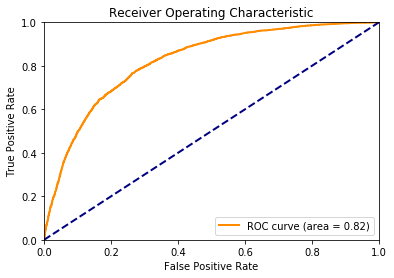

In [33]:
y_score = clf.decision_function(testingX)
fpr, tpr, thresholds = roc_curve(testingY, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()